# Одномерная линейная регрессия и градиентный спуск

В этой части мы применим линейную регрессию с одной переменной, чтобы предсказать прибыль от продовольственных перевозок. Допустим, имеется ресторанная франшиза, которая рассматривает новые города для расширения бизнеса. В компании уже имеются грузовики в различных городах, и у нас есть данные по прибыли и численности населения в них.

Необходимо выбрать следующий город для расширения компании.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
data = np.genfromtxt('ex1data1.csv', delimiter=',')

## Визуализация данных

In [ ]:
x = data[:, 0].reshape(-1,1)
y = data[:, 1].reshape(-1,1)
m = len(y)

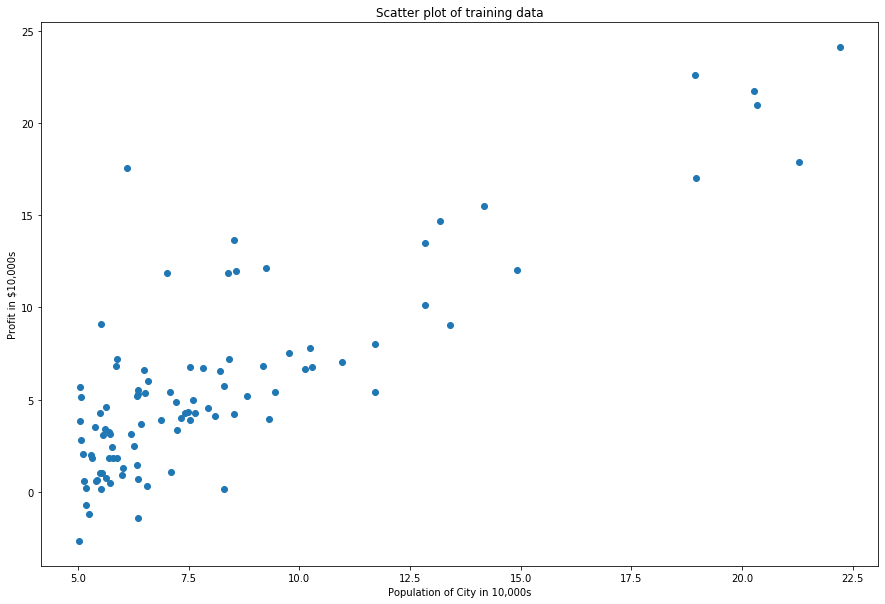

In [4]:
plt.figure(figsize=(15, 10))
plt.scatter(x, y)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.title('Scatter plot of training data')
plt.show()

## Градиентный спуск

Цель линейной регрессии состоит в минимизации функции потерь
$$ J(\theta) = \dfrac{1}{2m} \sum\limits_{i = 1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 \rightarrow \min\limits_\theta, $$
где гипотеза $h_\theta(x)$ задана линейным уравнением
$$h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1. $$

Одним из методов минимизации функции потерь является градиентный спуск. Согласно ему, каждая итерация выполняет обновление переменных, по которым минимизируется функция, по формуле
$$ \theta_j = \theta_j - \alpha \dfrac{1}{m} \sum\limits_{i = 1}^{m} \left( h_\theta(x^{(i)} - y^{(i)} \right) x_j^{(i)}, \quad j = 0, 1, \dots $$
С каждым шагом градиентного спуска, параметры $\theta_j$ приближаются к оптимальным значениям, которые позволяют функции $J(\theta)$ достичь своего минимума.

## Реализация

Добавим к `x` ещё один вектор из единиц, который будет соответствовать пересечению $\theta_0$. Инициализируем коэффициенты регрессии $\theta_0$ и $\theta_1$ нулями и скорость обучения $\alpha$ значением $0.01$.

In [5]:
x = np.column_stack((np.ones((m,)), x))
theta = np.zeros((2, 1))

iterations = 1500;
alpha = 0.01;

### Вычисление функции потерь

Функция `computeCost()` будет вычислять значение функции потерь, чтобы отслеживать сходимость градиентного спуска.

In [6]:
def computeCost(x, y, theta):
    m = len(y)
    J = 0
    
    return 1 / (2 * m) * np.sum((x.dot(theta) - y) ** 2)

In [7]:
J_0 = computeCost(x, y, theta)
J_0

32.072733877455676

### Градиентный спуск

Функция `gradientDescent()` выполняет градиентный спуск, в результате которого определяются такие оптимальные значения коэффициентов $\theta_0$ и $\theta_1$, чтобы они минимизировали функцию потерь $J(\theta)$. На каждой итерации значения этих коэффициентов обновляются согласно выше представленной формуле, после чего вычисляется значение функции потерь.

In [8]:
def gradientDescent(x, y, theta, alpha, num_iters):
    m = len(y)
    J_history = list()

    for _ in range(num_iters):
        for j in range(2):
            theta[j, 0] -= alpha / m * np.sum((x.dot(theta) - y) * x[:, j].reshape(-1, 1))

        J_history.append(computeCost(x, y, theta))

    return theta, J_history

In [9]:
theta, J = gradientDescent(x, y, theta, alpha, iterations)

В результате выполнения градиентного спуска получили следующие значения коэффициентов регрессии.

In [10]:
print(f'theta_0 = {theta[0, 0]},\ntheta_1 = {theta[1, 0]}')

theta_0 = -3.6360634754794994,
theta_1 = 1.1669891581648784


Посмотрим на поведение функции потерь. На каждой итерации градиентного спуска значение функции потерь уменьшается, что и требуется.

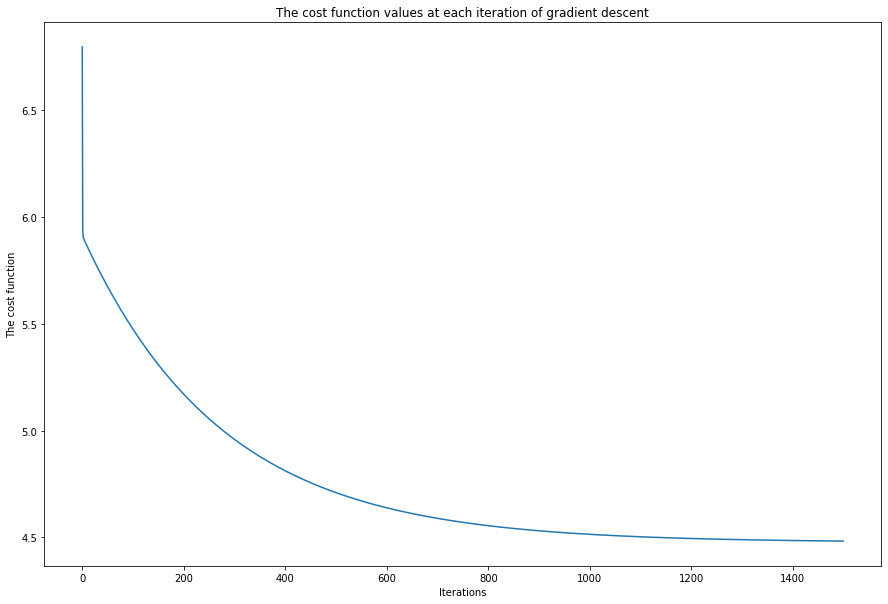

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(range(iterations), J)
plt.xlabel('Iterations')
plt.ylabel('The cost function')
plt.title('The cost function values at each iteration of gradient descent')
plt.show()

Ещё интереснее посмотреть на поведение функции потерь в зависимости от значений $\theta_0$ и $\theta_1$.

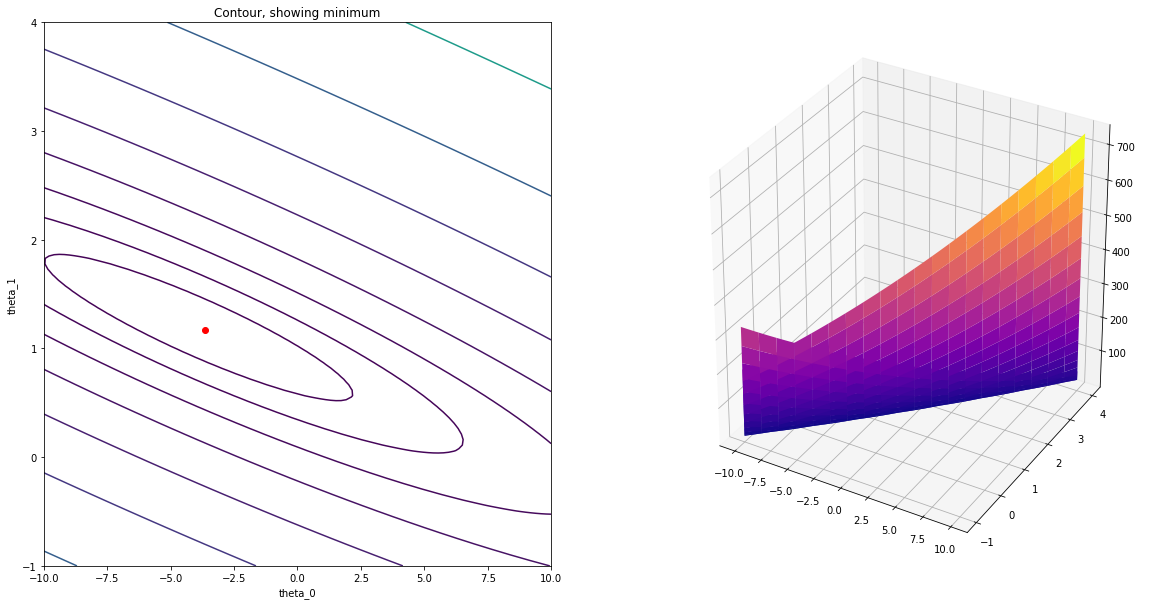

In [12]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = computeCost(x, y, t)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)

ax.contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(-2, 3, 20))
ax.scatter(*theta, color='red')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_title('Contour, showing minimum')

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals.T, rstride=5, cstride=5, linewidth=0, cmap=cm.plasma)
plt.show()

Получив значения коэффициентов регрессии, минимизирующие функцию потерь, мы можем теперь предсказать прибыль от продовольственных перевозок в зависимости от численности населения города. Посмотрим, какая ожидается прибыль от городов с населением 35000 и 70000 человек.

In [13]:
profit_35k = round(np.vdot([1, 3.5], theta) * 10000)
profit_70k = round(np.vdot([1, 7], theta) * 10000)

print(f'For population of 35,000 people we predict a profit of {profit_35k}$.\nFor population of 70,000 people we predict a profit of {profit_70k}$.')

For population of 35,000 people we predict a profit of 4484.0$.
For population of 70,000 people we predict a profit of 45329.0$.


Следующий график показывает, что прямая линейной регрессии хорошо описывает наши данные. Видно, что между прибылью и численностью населения существует положительная зависимость.

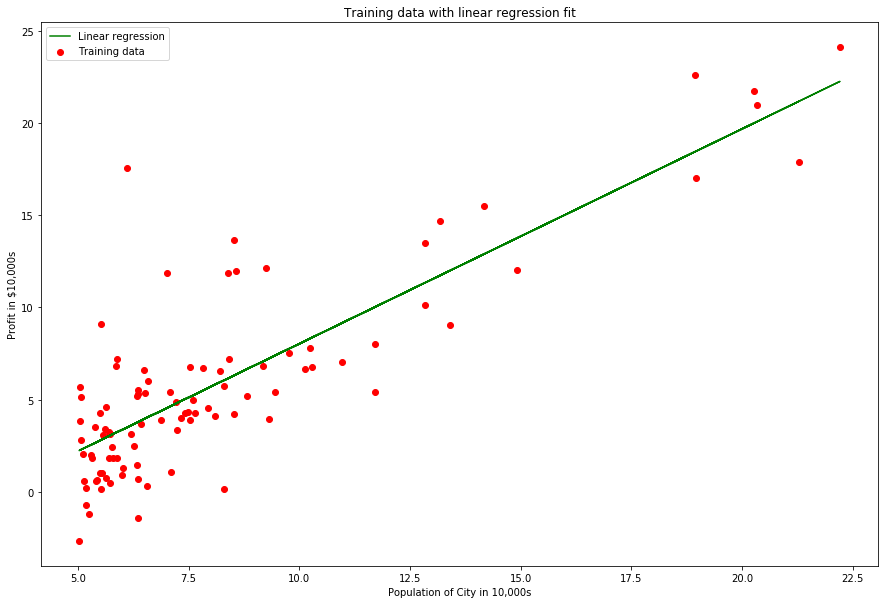

In [14]:
plt.figure(figsize=(15, 10))
plt.scatter(x[:, 1], y, color='red')
plt.plot(x[:, 1], x.dot(theta), color='green')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend(['Linear regression', 'Training data'])
plt.title('Training data with linear regression fit')
plt.show()

# Список использованных источников

1. Материалы курса Machine Learning - Andrew Ng, Stanford University on Coursera.